In [1]:
from UTILITY_quickstart import *

?initializeTao

Signature:
initializeTao(
    filePath=None,
    lastTrackedElement='end',
    csrTF=False,
    inputBeamFilePathSuffix=None,
    numMacroParticles=None,
    loadDefaultLatticeTF=True,
    runImpactTF=False,
    impactGridCount=32,
)
Docstring: <no docstring>
File:      ~/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py
Type:      function

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to L0BFEND
CSR off
Loading default setLattice() values
Running Impact
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpij80_wz_
/opt/homebrew/anaconda3/envs/bmadclone/bin/ImpactTexe
writing 10000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpij80_wz_/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 6.975027738393908e-12 according to initial particles
Cathode start: Replaced Tini with -3.494221907926707e-12 according to initial particles
Setting total charge to 1.6000000000000007e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.3.1
 ! C

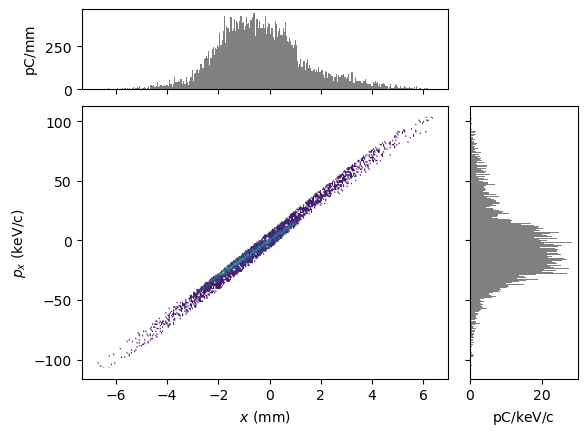

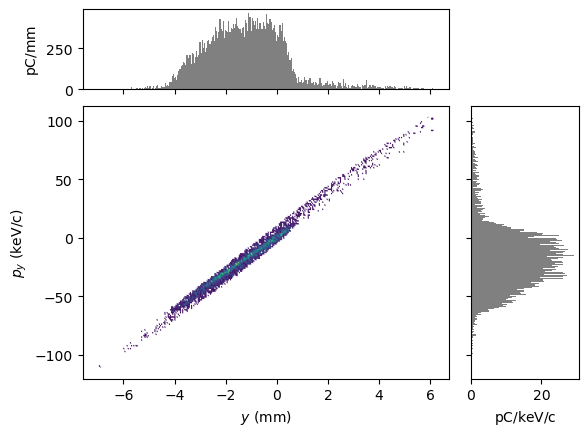

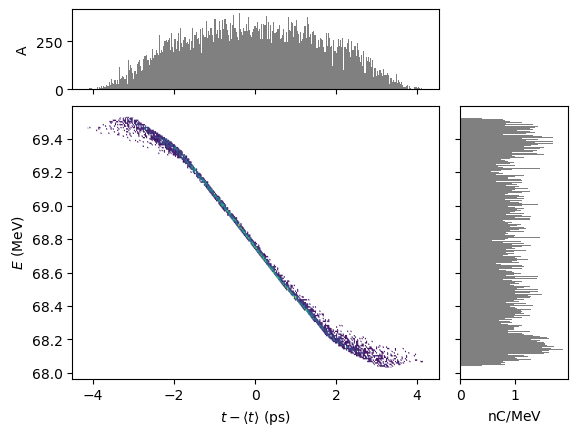

In [21]:
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights_driverOnly_2023-05-16InjectorMatch.h5',
    #inputBeamFilePathSuffix = '/beams/L0AFEND_facet2-lattice.h5',

    runImpactTF=True,
    impactGridCount=8,
    numMacroParticles=1e4,

    lastTrackedElement = "L0BFEND"
)

trackBeam(tao)

P =  ParticleGroup(data=tao.bunch_data("L0AFEND"))
display(plotMod(P, 'x', 'px',  bins=300))
display(plotMod(P, 'y', 'py',  bins=300))
display(plotMod(P, 'delta_t', 'energy',  bins=300))

In [3]:
trackBeam(tao)

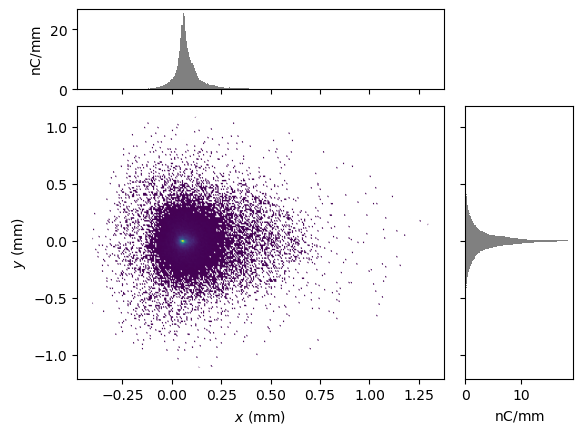

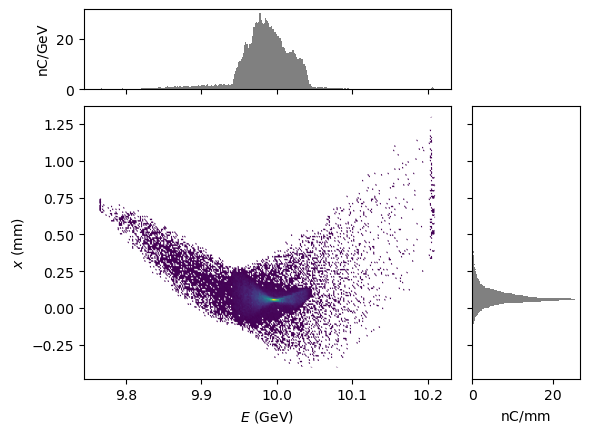

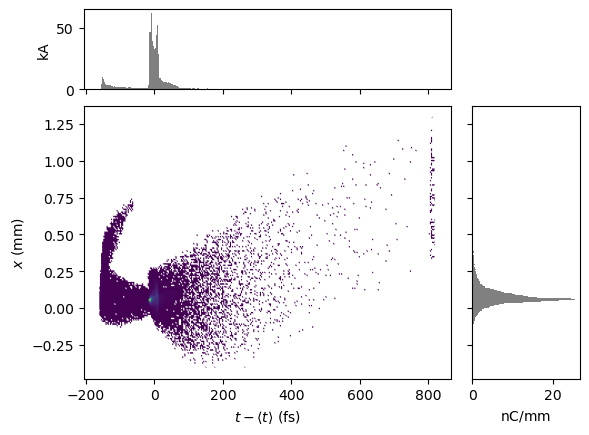

ParticleGroup with 100000 particles with total charge 1.999999999999996e-09 C


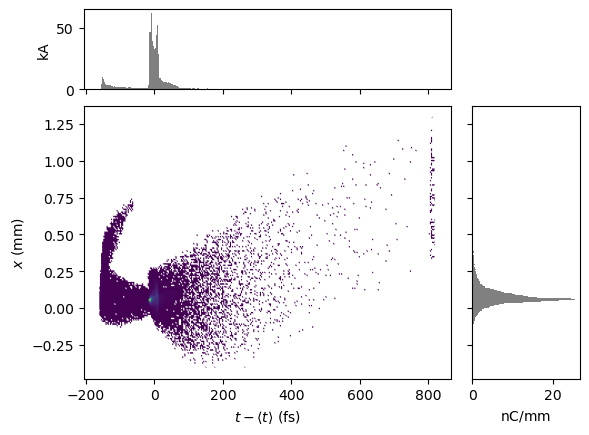

In [4]:
P =  ParticleGroup(data=tao.bunch_data("MFFF"))
display(plotMod(P, 'x', 'y',  bins=300))
display(plotMod(P, 'energy', 'x',  bins=300))
display(plotMod(P, 'delta_t', 'x',  bins=300))

print(P)

In [5]:
P["sigma_x"]

0.00010804999245670347

Sum counts: 99052


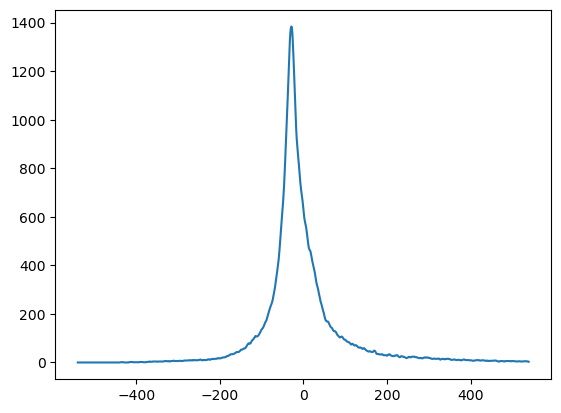

In [6]:
P =  ParticleGroup(data=tao.bunch_data("MFFF"))
P = P[P.status == 1]

xData = P.x
xData = xData - np.mean(xData)

from scipy.ndimage import gaussian_filter1d
def histogramDataUnified(data):
    
    
    counts, bin_edges = np.histogram(data, 
                                     range=(
                                         np.mean(data) - 5*np.std(data),
                                         np.mean(data) + 5*np.std(data)
                                     ), 
                                     #bins = int(len(data)/100)
                                     bins = 1000
                                    )

    #Optional: Gaussian blur
    counts = gaussian_filter1d(counts, 2.0)
    
    return counts, bin_edges

# Generate histogram data
counts, bin_edges = histogramDataUnified(xData)

# Print histogram data
# print("Counts:", counts)
# print("Bin edges:", bin_edges)

print(f"Sum counts: {np.sum(counts)}")


# Plotting the histogram
plt.plot(1e6*(bin_edges[:-1]),counts)
plt.show()

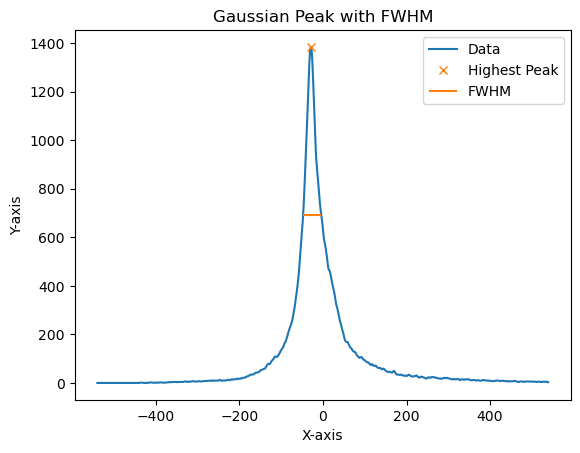

In [7]:
from scipy.signal import find_peaks, peak_widths

# Create some example data
x = 1e6*(bin_edges[:-1])
y = counts

# Find the peaks in the data
peaks, properties = find_peaks(y)

# Identify the highest peak
highest_peak = peaks[np.argmax(y[peaks])]

# Calculate the FWHM using peak_widths for the highest peak
results_half = peak_widths(y, [highest_peak], rel_height=0.5)

# Interpolate to find more accurate x positions for the half-maximum points
x_min = np.interp(results_half[2], np.arange(len(x)), x)
x_max = np.interp(results_half[3], np.arange(len(x)), x)

# Plot the data, the highest peak, and the FWHM
plt.plot(x, y, label='Data')
plt.plot(x[highest_peak], y[highest_peak], 'x', label='Highest Peak')
plt.hlines(results_half[1], x_min, x_max, color='C1', label='FWHM')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Gaussian Peak with FWHM')
plt.show()


In [8]:
fwhm = (x_max-x_min)[0]
impliedRMS = fwhm / 2.355
print(f"""Actual RMS = \t\t\t{1e6*P["sigma_x"]}""")
print(f"FWHM = \t\t\t\t{fwhm} \nImplied (Gaussian) RMS = \t{impliedRMS}")

Actual RMS = 			108.04999245670346
FWHM = 				43.32829883992248 
Implied (Gaussian) RMS = 	18.39842838213269
